In [1]:
from google.colab import files
x = files.upload()

Saving data-20230219T141116Z-001.zip to data-20230219T141116Z-001.zip


In [2]:
 ! ls -hl

total 153M
-rw-r--r-- 1 root root 153M Feb 28 10:27 data-20230219T141116Z-001.zip
drwxr-xr-x 1 root root 4.0K Feb 24 14:38 sample_data


In [3]:
! unzip data-20230219T141116Z-001.zip

Archive:  data-20230219T141116Z-001.zip
  inflating: data/test/fresh cotton plant/dsd (600).jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (224)_iaip.jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (118)_iaip.jpg  
  inflating: data/test/fresh cotton leaf/d (341).jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (328)_iaip.jpg  
  inflating: data/test/fresh cotton plant/dsd (632).jpg  
  inflating: data/test/fresh cotton leaf/d (366).jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (57)_iaip.jpg  
  inflating: data/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (85)_iaip.jpg  
  inflating: data/test/fresh cotton plant/dsd (405).jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (231)_iaip.jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (219)_iaip.jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: data/val/diseased cotton leaf/dis_leaf (324)_iai

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/test'

In [7]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


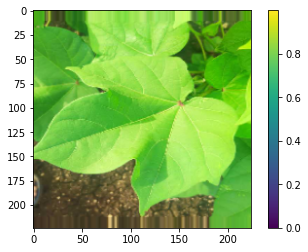

[0. 0. 1. 0.]


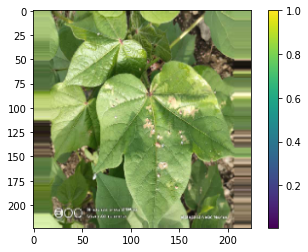

[1. 0. 0. 0.]


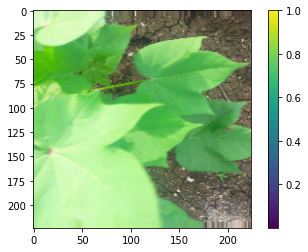

[0. 0. 1. 0.]


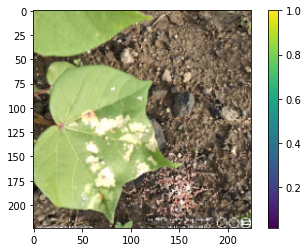

[1. 0. 0. 0.]


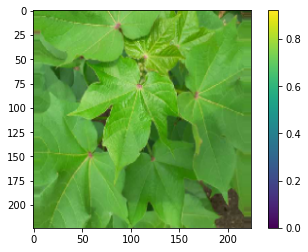

[0. 0. 0. 1.]


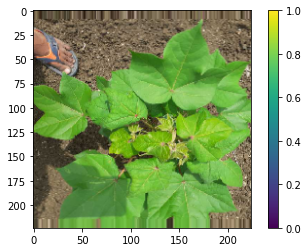

[0. 1. 0. 0.]


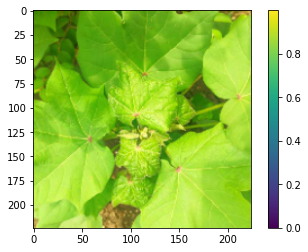

[0. 1. 0. 0.]


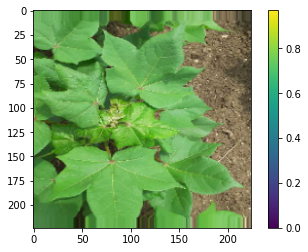

[0. 1. 0. 0.]


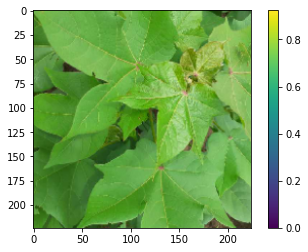

[0. 0. 0. 1.]


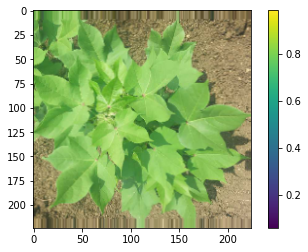

[0. 0. 0. 1.]


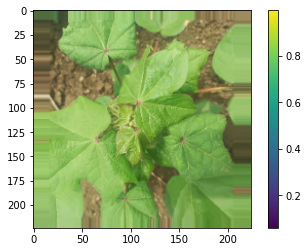

[0. 1. 0. 0.]


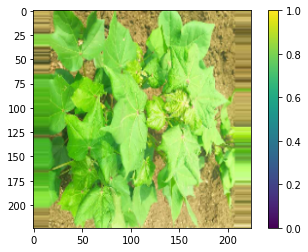

[0. 1. 0. 0.]


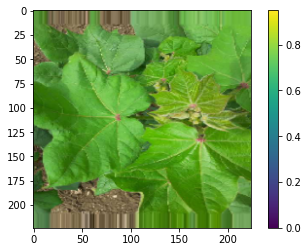

[0. 1. 0. 0.]


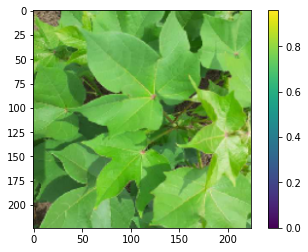

[0. 0. 0. 1.]


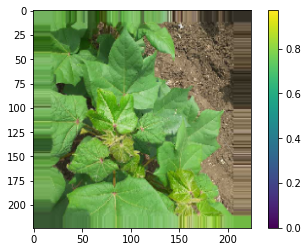

[0. 1. 0. 0.]


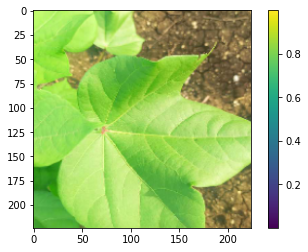

[0. 0. 1. 0.]


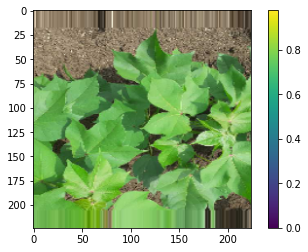

[0. 0. 0. 1.]


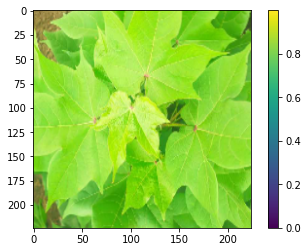

[0. 0. 0. 1.]


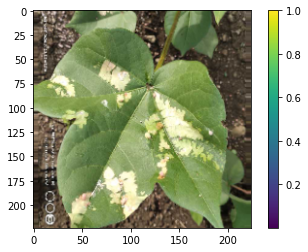

[1. 0. 0. 0.]


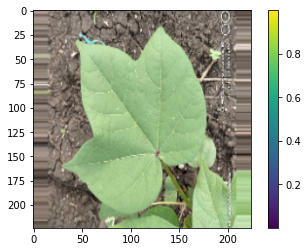

[0. 0. 1. 0.]


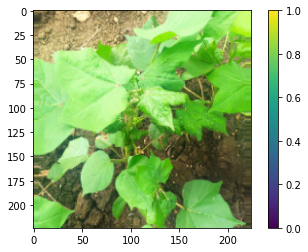

[0. 1. 0. 0.]


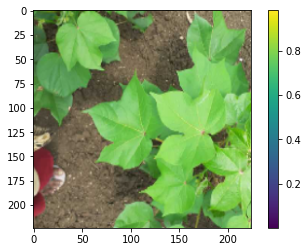

[0. 0. 0. 1.]


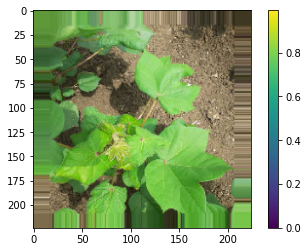

[0. 1. 0. 0.]


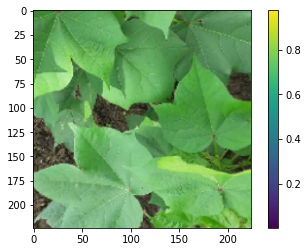

[0. 0. 0. 1.]


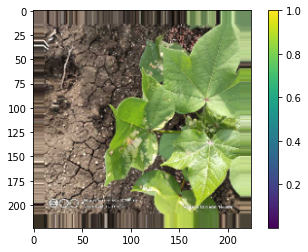

[1. 0. 0. 0.]


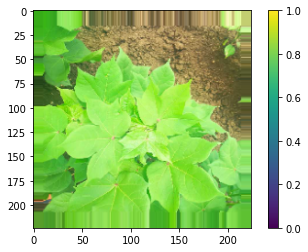

[0. 0. 0. 1.]


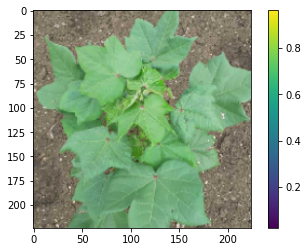

[0. 1. 0. 0.]


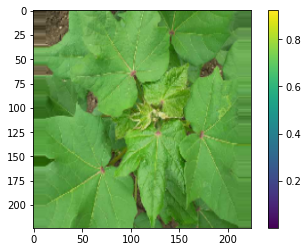

[0. 1. 0. 0.]


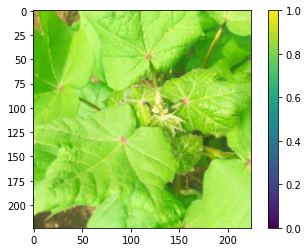

[0. 1. 0. 0.]


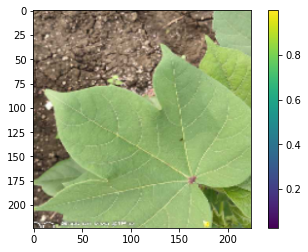

[0. 0. 1. 0.]


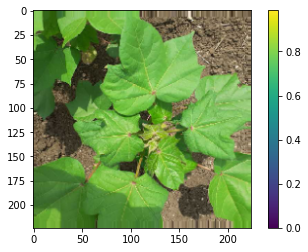

[0. 1. 0. 0.]


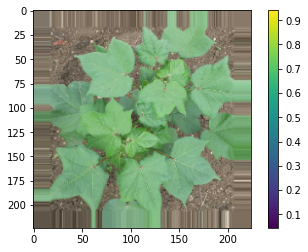

[0. 1. 0. 0.]


In [9]:
for my_batch in training_set:
  # my_batch is a tuple with images and labels
  images = my_batch[0]
  labels = my_batch[1]
  for i in range(len(labels)):
    # Gives oe image and its corresponding label
    plt.imshow(images[i])
    plt.colorbar()
    plt.show()
    print(labels[i])
    
  break


In [10]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


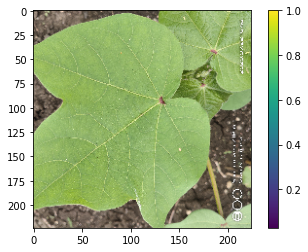

[0. 0. 1. 0.]


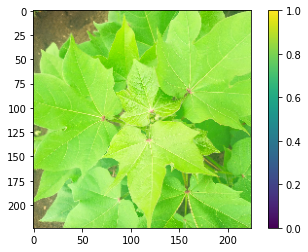

[0. 0. 0. 1.]


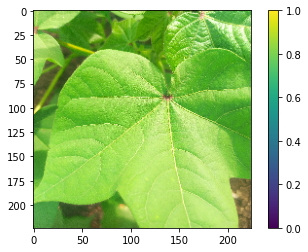

[0. 0. 1. 0.]


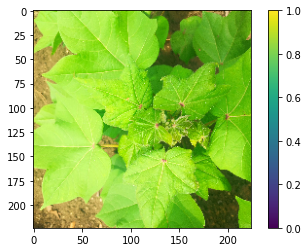

[0. 1. 0. 0.]


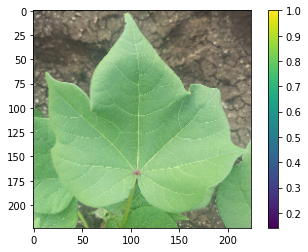

[0. 0. 1. 0.]


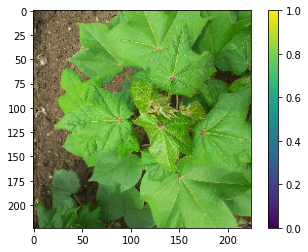

[0. 1. 0. 0.]


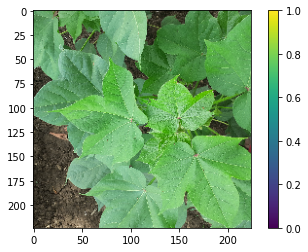

[0. 0. 0. 1.]


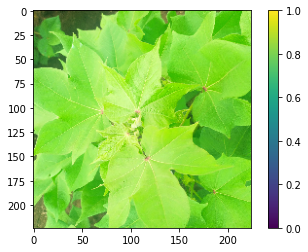

[0. 0. 0. 1.]


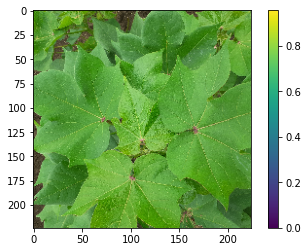

[0. 0. 0. 1.]


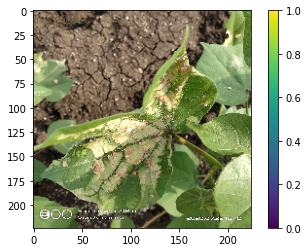

[1. 0. 0. 0.]


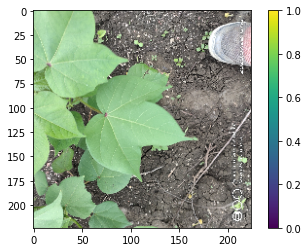

[0. 0. 1. 0.]


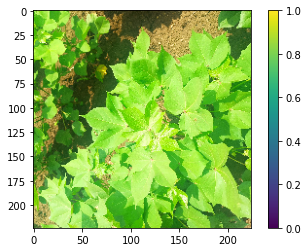

[0. 0. 0. 1.]


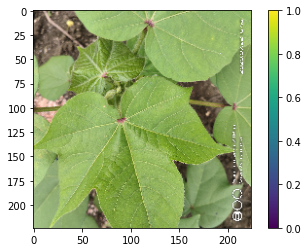

[0. 0. 1. 0.]


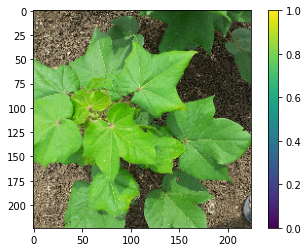

[0. 1. 0. 0.]


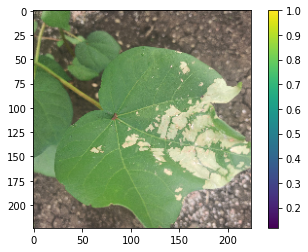

[1. 0. 0. 0.]


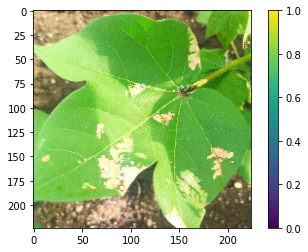

[1. 0. 0. 0.]


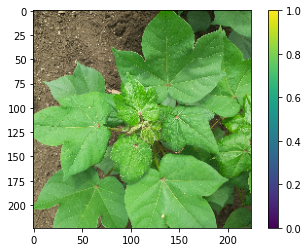

[0. 1. 0. 0.]


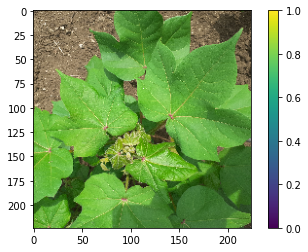

[0. 1. 0. 0.]


In [11]:
for my_batch in test_set:
  # my_batch is a tuple with images and labels
  images = my_batch[0]
  labels = my_batch[1]
  for i in range(len(labels)):
    # Gives oe image and its corresponding label
    plt.imshow(images[i])
    plt.colorbar()
    plt.show()
    print(labels[i])
    
  break


In [12]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [13]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [14]:
 # useful for getting number of output classes
folders = glob('data/train/*')

In [15]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-3b4ec9fc1850>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
61/61 [==============================] - 255s 4s/step - loss: 2.8796 - accuracy: 0.7201 - val_loss: 0.5338 - val_accuracy: 0.8333
Epoch 2/30
61/61 [==============================] - 244s 4s/step - loss: 0.5312 - accuracy: 0.8970 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 3/30
61/61 [==============================] - 239s 4s/step - loss: 0.5984 - accuracy: 0.8949 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 4/30
61/61 [==============================] - 244s 4s/step - loss: 0.4769 - accuracy: 0.9180 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 5/30
61/61 [==============================] - 239s 4s/step - loss: 0.4324 - accuracy: 0.9195 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 6/30
61/61 [==============================] - 240s 4s/step - loss: 0.5243 - accuracy: 0.9170 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 7/30
61/61 [==============================] - 240s 4s/step - loss: 0.3438 - accuracy: 0.9375 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/30
61

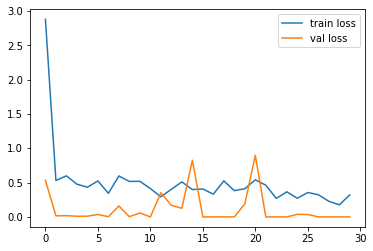

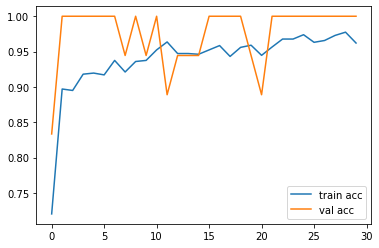

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
print("train loss:", r.history['loss'][-1])
print("val loss:", r.history['loss'][-1])

train loss: 0.3214253783226013
val loss: 0.3214253783226013


In [22]:
print("train accuracy:", r.history['accuracy'][-1])
print("val accuracy:", r.history['accuracy'][-1])

train accuracy: 0.9620707035064697
val accuracy: 0.9620707035064697


In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [24]:
y_pred = model.predict(test_set)

1/1 [==============================] - 7s 7s/step


In [25]:
y_pred

array([[2.4560956e-26, 1.6276441e-36, 9.9999994e-01, 4.3427158e-19],
       [7.6098718e-21, 2.6759671e-36, 9.9999994e-01, 1.8593316e-21],
       [0.0000000e+00, 9.9999994e-01, 2.1989852e-19, 2.4481205e-08],
       [1.5612387e-24, 4.4863444e-10, 3.3132455e-17, 9.9999994e-01],
       [3.0214004e-30, 2.2263307e-28, 9.9999994e-01, 5.5898662e-14],
       [8.3376441e-30, 9.9999982e-01, 2.3421867e-16, 1.2595601e-07],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 4.7060340e-33],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.9456680e-25, 9.9999994e-01],
       [2.8634029e-35, 0.0000000e+00, 9.9999994e-01, 3.2226863e-38],
       [9.9999970e-01, 0.0000000e+00, 9.1044643e-26, 1.8012003e-07],
       [0.0000000e+00, 9.9999994e-01, 1.6101079e-11, 5.7984254e-13],
       [1.4562762e-27, 9.1725860e-18, 9.9999994e-01, 1.8220461e-30],
       [9.9998540e-01, 1.4085702e-05, 9.8163003e-20, 4.8710808e-07],
       [0.0000000e+00, 0.0000000e+

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([2, 2, 1, 3, 2, 1, 1, 1, 3, 2, 0, 1, 2, 0, 3, 3, 0, 3])